In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import Imputer

In [2]:
# Métrica de evaluación
def RMSLE(actual, pred):
    return (np.mean((np.log(actual + 1) - np.log(pred + 1)) ** 2)) **.5

In [3]:
#Archivos de train y test
df_train = pd.read_csv("data/train.csv", index_col=0)
df_submit = pd.read_csv("data/test.csv", index_col=0)

In [4]:
df_train.tipodepropiedad = df_train.tipodepropiedad.astype('category').cat.codes
df_train.ciudad = df_train.ciudad.astype('category').cat.codes
df_train.provincia = df_train.provincia.astype('category').cat.codes
df_train.fecha = pd.to_datetime(df_train.fecha)
df_train.fecha = df_train.fecha.dt.year

df_submit.tipodepropiedad = df_submit.tipodepropiedad.astype('category').cat.codes
df_submit.ciudad = df_submit.ciudad.astype('category').cat.codes
df_submit.provincia = df_submit.provincia.astype('category').cat.codes
df_submit.fecha = pd.to_datetime(df_submit.fecha)
df_submit.fecha = df_submit.fecha.dt.year


In [5]:
nulls = pd.DataFrame(df_train.isnull().sum().sort_values(ascending=False), columns=['nulls'])
nulls['porcentaje'] = round(100*nulls['nulls'] / len(df_train), 2)
nulls

,nulls,porcentaje
lng,123488,51.45
lat,123488,51.45
direccion,53072,22.11
metrostotales,51467,21.44
antiguedad,43555,18.15
garages,37765,15.74
idzona,28621,11.93
banos,26221,10.93
habitaciones,22471,9.36
metroscubiertos,17400,7.25


In [6]:
df_train=df_train.drop(columns=['titulo','descripcion','direccion', 'lat', 'lng'])
df_train.antiguedad = df_train.antiguedad.fillna(0)
df_train.habitaciones = df_train.habitaciones.fillna(0)
df_train.garages = df_train.garages.fillna(0)
df_train.banos = df_train.banos.fillna(0)
df_train.dropna(subset=['idzona'],inplace=True)
df_train['metrostotales'].fillna(df_train['metroscubiertos'], inplace=True)
df_train['metroscubiertos'].fillna(0, inplace=True)

In [7]:
nulls = pd.DataFrame(df_train.isnull().sum().sort_values(ascending=False), columns=['nulls'])
nulls['porcentaje'] = round(100*nulls['nulls'] / len(df_train), 2)
nulls

,nulls,porcentaje
precio,0,0.0
metroscubiertos,0,0.0
ciudad,0,0.0
provincia,0,0.0
antiguedad,0,0.0
habitaciones,0,0.0
garages,0,0.0
banos,0,0.0
metrostotales,0,0.0
centroscomercialescercanos,0,0.0


In [8]:
X = df_train.iloc[:, :-1].values
y = df_train.precio.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
error = []
calcRange = (2, 10)
# Calculating error for K values between 5 and 15
for i in range(calcRange[0],calcRange[1]):
    print(i)
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(RMSLE(y_test, pred_i))

2
3
4
5
6
7
8
9


Text(0, 0.5, 'RMSLE Error')

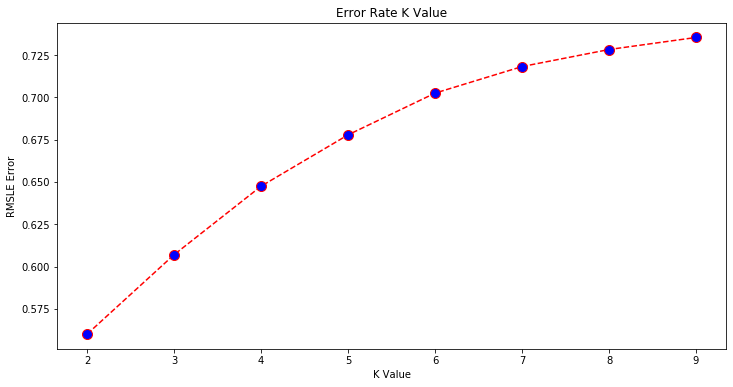

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(range(calcRange[0],calcRange[1]), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('RMSLE Error')

In [11]:
print(pred_i.shape)
print(X_test.shape)
print(y_test.shape)

(42276,)
(42276, 16)
(42276,)


In [12]:
nulls = pd.DataFrame(df_submit.isnull().sum().sort_values(ascending=False), columns=['nulls'])
nulls['porcentaje'] = round(100*nulls['nulls'] / len(df_submit), 2)
nulls

,nulls,porcentaje
lng,30695,51.16
lat,30695,51.16
direccion,13191,21.98
metrostotales,12655,21.09
antiguedad,10714,17.86
garages,9323,15.54
idzona,7179,11.96
banos,6554,10.92
habitaciones,5628,9.38
metroscubiertos,4299,7.16


In [13]:
df_submit=df_submit.drop(columns=['titulo','descripcion','direccion', 'lat', 'lng'])
df_submit.antiguedad = df_submit.antiguedad.fillna(0)
df_submit.habitaciones = df_submit.habitaciones.fillna(0)
df_submit.garages = df_submit.garages.fillna(0)
df_submit.banos = df_submit.banos.fillna(0)
#df_submit.dropna(subset=['idzona'],inplace=True)
df_submit['metrostotales'].fillna(df_submit['metroscubiertos'], inplace=True)
df_submit['metroscubiertos'].fillna(0, inplace=True)

In [14]:
imp = Imputer()
df_submit['idzona'] = imp.fit_transform(df_submit[['idzona']])

/home/rama/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [15]:
nulls = pd.DataFrame(df_submit.isnull().sum().sort_values(ascending=False), columns=['nulls'])
nulls['porcentaje'] = round(100*nulls['nulls'] / len(df_submit), 2)
nulls

,nulls,porcentaje
centroscomercialescercanos,0,0.0
escuelascercanas,0,0.0
piscina,0,0.0
usosmultiples,0,0.0
gimnasio,0,0.0
fecha,0,0.0
idzona,0,0.0
metrostotales,0,0.0
metroscubiertos,0,0.0
banos,0,0.0


In [21]:
X = df_train.iloc[:, :-1].values
y = df_train.precio.values
X_test = df_submit.iloc[:, :].values
scaler = StandardScaler()
scaler.fit(X)


X = scaler.transform(X)
X_test = scaler.transform(X_test)

In [22]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X, y)
pred_KNN = knn.predict(X_test)

In [23]:
res = pd.DataFrame(pred_KNN, index=df_submit.index, columns=['target'])
display(res.head())
res.to_csv("data/workshop-submission-knn.csv", header=True)

,target
id,
4941,6500000.0
51775,490000.0
115253,2610000.0
299321,1575000.0
173570,450000.0


In [24]:
X = df_train.iloc[:, :-1].values
y = df_train.precio.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
pred_i = knn.predict(X_test)
print(RMSLE(y_test, pred_i))

0.3664579992620725


In [26]:
error = []
calcRange = (2, 10)
# Calculating error for K values between 5 and 15
for i in range(calcRange[0],calcRange[1]):
    print(i)
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(y_test != pred_i))

2
3
4
5
6
7
8
9


Text(0, 0.5, 'Mean Error')

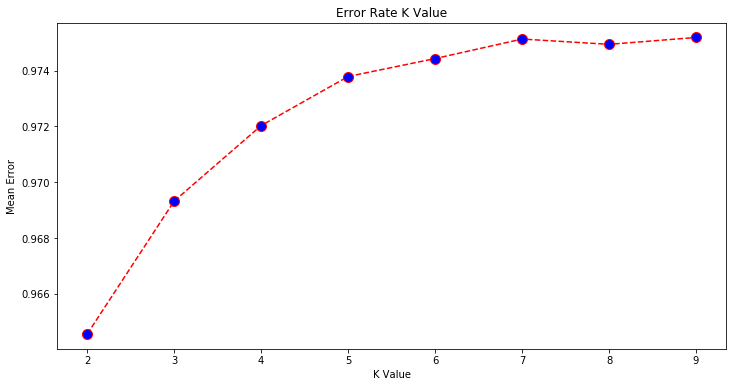

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(range(calcRange[0],calcRange[1]), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [28]:
def normailize_df(refDf, train):
    df = refDf.copy()
    df['año'] = df['fecha'].dt.year
    df['antiguedad'] = df['antiguedad'] + (2016 - df['año']) # Se normaliza la antiguedad.
    df.antiguedad = df.antiguedad.fillna(0) #Asumo que si no tiene antiguedad entonces es nuevo
    df.drop(["direccion", 'descripcion', 'lat', 'lng', 'fecha', 'ciudad', 'provincia', 'titulo'], axis=1, inplace=True)
    
    nulltotales = df[df['metrostotales'].isnull()]
    nullcubiertos = df[df['metroscubiertos'].isnull()]
    notnullapart = df[(~ df['metrostotales'].isnull()) & (df['metrostotales'] < df['metroscubiertos'])]
    notnullapart2 = df[(~ df['metrostotales'].isnull()) & (df['metrostotales'] > df['metroscubiertos'])]
    notnullapart3 = df[(~ df['metrostotales'].isnull()) & (df['metrostotales'] == df['metroscubiertos'])]
 
    df['habitable'] = False
    tipodepropiedades = df.tipodepropiedad.cat.categories.to_list()
    for tipodepropiedad in tipodepropiedades: 
              
        idsNullMetrosTotales = (df.tipodepropiedad == tipodepropiedad) & (df.metrostotales.isnull())
        idsNullMetrosCubiertos = (df.tipodepropiedad == tipodepropiedad) & (df.metroscubiertos.isnull())
        banos = df[df.tipodepropiedad == tipodepropiedad].banos.mode(dropna=False);
        habitaciones = df[df.tipodepropiedad == tipodepropiedad].habitaciones.mode(dropna=False);

        ## Verificamos si la cantidad de registros con metros cubiertos nulos es mayor a 2/5 de los totales. Si es asi 
        ## los consideramos propiedades no habitables. Y los tratamos de manera diferente
        if(len(nullcubiertos[nullcubiertos.tipodepropiedad == tipodepropiedad]) >= 2/5* len(df[df.tipodepropiedad == tipodepropiedad])):
            df.metrostotales.fillna(0, inplace=True)
            df.metroscubiertos.fillna(0, inplace=True)
        else:
            df[idsNullMetrosTotales]['metrostotales'] =  df[idsNullMetrosTotales]['metroscubiertos']
            df[idsNullMetrosCubiertos]['metroscubiertos'] =  df[idsNullMetrosCubiertos]['metrostotales']

        #Si la moda del tipo de propiedad de banos y habitaciones son ambas distintas de nan entonces la propiedad es habitable.

        df.loc[(df.tipodepropiedad == tipodepropiedad), 'habitable'] = not(np.isnan(banos[0]) and np.isnan(habitaciones[0]))
    
    df['metros'] = df['metrostotales'] + df['metroscubiertos']
    df.habitaciones = df.habitaciones.fillna(0)
    df.garages = df.garages.fillna(0)
    df.banos = df.banos.fillna(0)
    df.idzona = df.idzona.fillna(50003995.0) # IDZona calculado que es la moda

    
    if(train):

        df.dropna(subset=['tipodepropiedad'],inplace=True)
        def is_outlier(group):
            Q1 = group.quantile(0.25)
            Q3 = group.quantile(0.75)
            IQR = Q3 - Q1
            precio_min = Q1 - 1.5 * IQR
            precio_max = Q3 + 1.5 * IQR
            return ~group.between(precio_min, precio_max)
        df['precio_mt2'] = df['precio'] / df['metros']
        print()
        
        df = df[~df.groupby('tipodepropiedad')['precio_mt2'].apply(is_outlier).fillna(False)]
        idDel = df_train[df_train.tipodepropiedad == 'Garage'].index
        df = df.drop(idDel)
        idDel = df_train[df_train.tipodepropiedad == 'Hospedaje'].index
        df = df.drop(idDel)
        print('Despues de filtrar: ', df.shape)
    else:
        df.tipodepropiedad = df.tipodepropiedad.fillna('Casa')   #El tipo de propiedad mas comun
    return df

In [29]:
#Archivos de train y test

df_train = pd.read_csv('data/train.csv',
        index_col='id',
        dtype={'gimnasio': int,
                'usosmultiples': int,
                'escuelascercanas': int,
                'piscina': int,
                'centroscomercialescercanos': int,
                'tipodepropiedad': 'category',
                'provincia': 'category',
                'ciudad': 'category'
            },
        parse_dates=['fecha'])
df_test = pd.read_csv('data/test.csv',
        index_col='id',
        dtype={'gimnasio': int,
                'usosmultiples': int,
                'escuelascercanas': int,
                'piscina': int,
                'centroscomercialescercanos': int,
                'tipodepropiedad': 'category',
                'provincia': 'category',
                'ciudad': 'category'
            },
        parse_dates=['fecha'])

df_train = normailize_df(df_train, True)
df_test = normailize_df(df_test, False)

tiposdepropiedades = df_train.tipodepropiedad.cat.categories.to_list()

cols = list(df_train.columns)
cols =  cols[:13] + cols[14:] +[cols[13]]
df_train = df_train[cols]

/home/rama/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rama/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Despues de filtrar:  (223429, 18)


In [30]:
error = []
calcRange = (2, 10)
# Calculating error for K values between 5 and 15
for i in range(calcRange[0],calcRange[1]):
    print(i)
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(y_test != pred_i))

2
3
4
5
6
7
8
9


Text(0, 0.5, 'Mean Error')

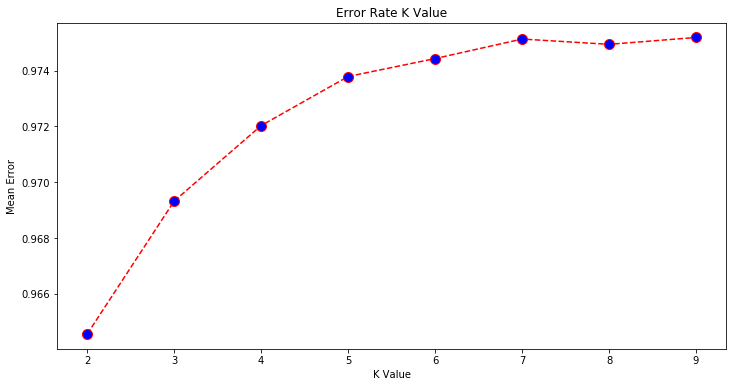

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(range(calcRange[0],calcRange[1]), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [32]:
error = []
calcRange = (2, 10)
# Calculating error for K values between 5 and 15
for i in range(calcRange[0],calcRange[1]):
    print(i)
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(RMSLE(y_test,pred_i))

2
3
4
5
6
7
8
9


Text(0, 0.5, 'RMSLE Error')

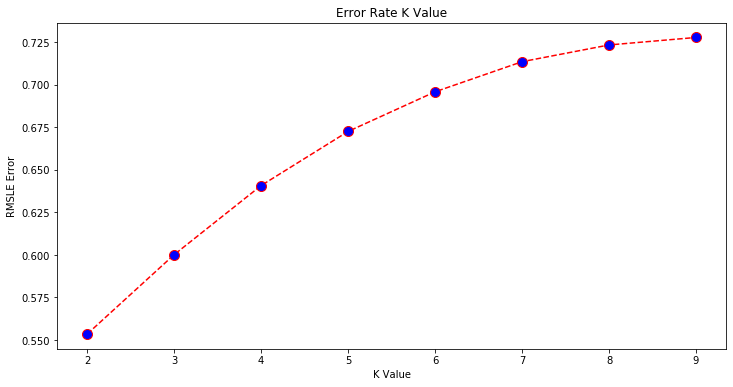

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(range(calcRange[0],calcRange[1]), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('RMSLE Error')